<a href="https://colab.research.google.com/github/rafaels100/fashionMNIST_neuralNetwork/blob/main/fashionMNIST_ClasificadorLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clasificador lineal: Aplicación sobre set fashion-MNIST de imágenes de ropa

Vamos a trabar sobre el set fashion-MNIST en la libreria keras, que consta de 70000 imágenes de 28x28 en escala de grises, divididas en 10 clases. Vamos a utilizar un clasificador lineal para que aprenda a clasificar imágenes que no ha visto en la categoría correspondiente. Se trata de un algoritmo de aprendizaje supervisado, pues tenemos tags para entrenar al modelo.

In [ ]:
#cargamos las librerias tipicas de python
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

Cargamos el dataset

In [ ]:
from keras.datasets import mnist, fashion_mnist

#divido al dataset en dos sets, uno de entrenamiento y otro de testeo.
#Esto se hace automaticamente con el metodo load(), dejando 60000 imagenes para el entrenamiento y 10000 para el testeo, con sus
#correspondientes tags en cada set.

(X_train_raw, y_train), (X_test_raw, y_test) = fashion_mnist.load_data()

#Ejemplo clarativo:
#(a,b), (c,d) = (1,2), (3,4)
#Esto le asigna a la variable a = 1, b = 2, c = 3, d = 4
#Es decir, no definimos tuplas, sino que definimos 4 variables. Usamos las tuplas para ayudarnos en la sintaxis.

#X_train_raw: Es una lista que contiene a la matrices de 28x28 que definen a las imagenes. Son 60000 imagenes en esta lista.
#y_train:     Es una lista que contiene a los tags de clase de ropa correspondientes a cada una de las imagenes en el set de entrenamiento.
#X_test_raw: Es una lista que contiene a la matrices de 28x28 que definen a las imagenes. Son 10000 imagenes en esta lista.
#y_test:     Es una lista que contiene a los tags de clase de ropa correspondientes a cada una de las imagenes en el set de testeo.

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
#Explorando la data:
print(X_train_raw.shape)
print(y_train.shape)
print(y_train[0])
print(X_test_raw.shape)
print(y_test.shape)
print(y_test[0])

(60000, 28, 28)
(60000,)
9
(10000, 28, 28)
(10000,)
9


Vemos que efectivamente el X_train_raw contiene a las 60000 matrices de 28x28 que corresponden a las imagenes del set de entrenamiento, e y_train contiene los tags asociados a cada imagen, que van de 0 a 9 (10 clases de ropa).
Lo mismo con el set de testeo.

Veamos ahora alguna de las imágenes en el set de entrenamiento, y asignémosle su correspondiente categoría de ropa:

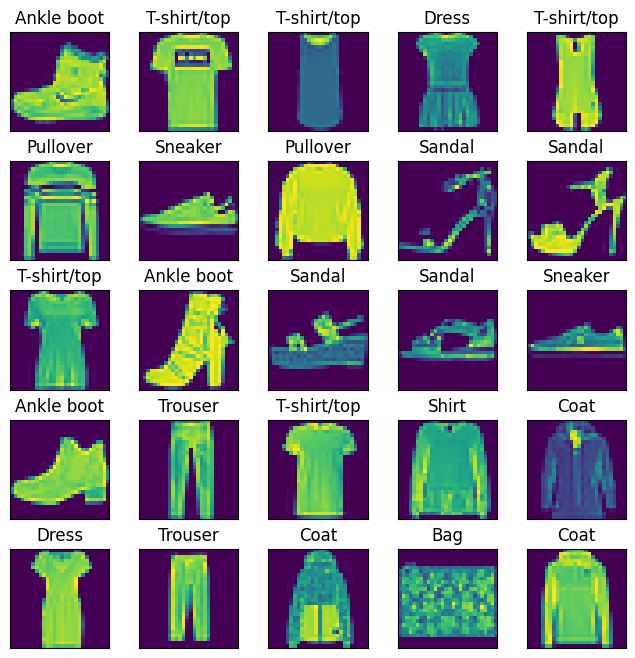

In [ ]:

#defino una lista donde cada elemento es una de las clases en las que se clasifican las imagenes
categories = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

#ploteo las imagenes con su categoria
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(8,8))
#creo una grid 5x5 donde colocare las 25 imagenes
grid = ImageGrid(fig, 111,          #similar a fig(111)
                 nrows_ncols=(5,5), #cantidad de filas y cols
                 axes_pad=0.3,)      #distancia entre los axes, en pulgadas

#ploteo las primeras 25 imagenes del dataset
#Para ello, uno a cada imagen con su correspondiente celda en la grid,
#usando zip, y luego uso enumerate para asignar un indice a cada celda.
#Con ax me refiero al axis, la celda, y con im, a la imagen.
for i, (ax, im) in enumerate(zip(grid, X_train_raw[:25])):
  #ploteo la imagen en la celda
  ax.imshow(im)
  #le asigno a cada imagen su categoria correspondiente, ya que los tags
  #estan dados en y_train, y estan ordenados acorde a las imagenes.
  #Usando la lista categories paso de los numeros de las categorias a los nombres
  ax.set_title(categories[y_train[i]])
  #quito los ticks de los ejes x e y
  ax.set_xticks([])
  ax.set_yticks([])

plt.show()


#Reshapeando las imagenes
Vamos a explorar el darle otras formas a la matriz de 28x28 que representa una imagen. Tenemos 28x28 = 784 elementos que podemos moldear a voluntad. Por ejemplo, podria obtener, de estos elementos, una lista de dos matrices de 28x14 cada una, pues 2x28x14 = 784.

In [ ]:
#Elijo una imagen, la primera, por ejemplo, para explorar el reshape
im = X_train_raw[0]
#puedo estirarla en un vector de 784 elementos
x = im.reshape(784)
#otra forma de hacerlo es dejando a numpy que realice ese pequeño calculo de 28x28 = 784 por nosotros: usando -1 numpy
#calcula automaticamente la cantidad de items que tenemos para reordenar, y la utiliza para el reshape
x_1 = im.reshape(-1)
print(x)
print(x_1)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0
   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   3   0
  36 136 127  62  54   0   0   0   1   3   4   0   0   3   0   0   0   0
   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0
   0   0   0  12  10   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15   0   0
   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163
 127 121 122 146 141  88 172  66   0   0   0   0   0   0   0   0   0   1
   1   1   0 200 232 232 233 229 223 223 215 213 16

In [ ]:
#explorando un poco mas con el reshape, podriamos ordenar los 784 elementos en una lista
#de matrices, de 784 / 2 = 392 items.
d = im.reshape(2, 392)
print(d)
print(d.shape)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0
    0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   3   0
   36 136 127  62  54   0   0   0   1   3   4   0   0   3   0   0   0   0
    0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0
    0   0   0  12  10   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15   0   0
    0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163
  127 121 122 146 141  88 172  66   0   0   0   0   0   0   0   0   0   1
    1   1   0 200 232 232 233 229 223 

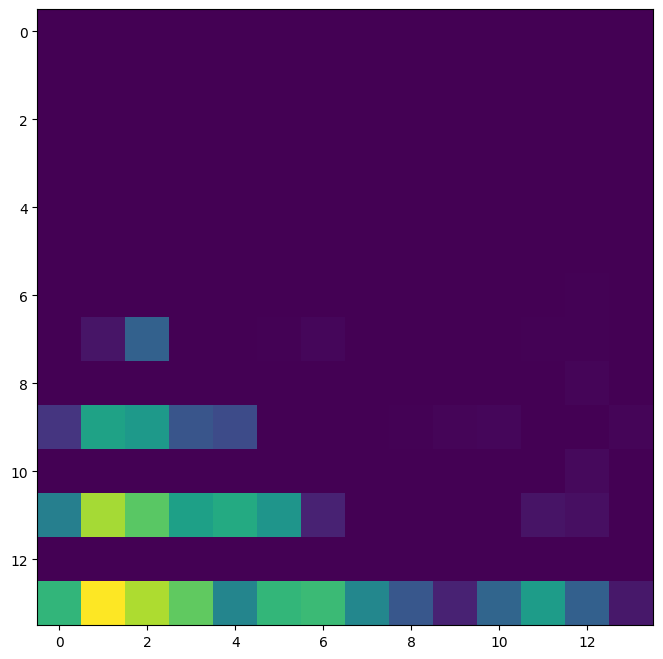

In [ ]:
#Podemos tomar los elementos que acabamos de splitear y generar una matriz
#de 28x14 = 392, por ejemplo, para que pueda ser ploteada como imagen
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
#tomo el primer elemento de 392 items y lo reshapeo a una matriz de 28x14
e = d[0].reshape(28,14)
#ax.imshow(e)
#plt.show()
#print(e)
#print(e.shape)

#podria haber spliteado la imagen en otras dos imagenes de la siguiente manera,
#de manera mas directa
f = im.reshape(2,28,14)
#print(f)
#veo la forma de las imagenes
#ax.imshow(f[0])
#ax.imshow(f[1])
#plt.show()

#tambien podria haber cortado a la imagen original de 28x28 en 4 partes, cada
#una de 14x14, pues 4x14x14 = 784, la cantidad de elementos originales:
g = im.reshape(4, 14, 14)
#veo la forma de cada una de estas imagenes
ax.imshow(g[0])
#ax.imshow(g[1])
#ax.imshow(g[2])
#ax.imshow(g[3])
plt.show()

#Ploteo de histograma
Tomamos una foto cualquiera del dataset y ploteamos un histograma, para ver como los valores de los pixeles estan distribuidos en la imagen.
Para ello es necesario 'desenrollar' la matriz de valores en una lista. Sabemos que tenemos 28x28 = 784 items que podemos reordenar a voluntad. En este caso, si solo pasamos 784, obtendremos una lista de ese largo

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0
   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   3   0
  36 136 127  62  54   0   0   0   1   3   4   0   0   3   0   0   0   0
   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0
   0   0   0  12  10   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15   0   0
   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163
 127 121 122 146 141  88 172  66   0   0   0   0   0   0   0   0   0   1
   1   1   0 200 232 232 233 229 223 223 215 213 16

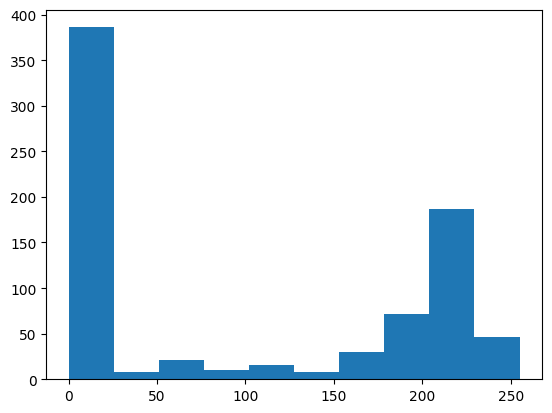

In [ ]:
#Elijo una imagen, la primera, por ejemplo, para explorar el reshape
im = X_train_raw[0]
#puedo estirarla en un vector de 784 elementos, calculado por numpy al usar el -1
x = im.reshape(-1)
plt.hist(x)
print(x, x.shape)
plt.show()

#Preparamos los datos para entrenar el modelo
Debemos usar nuestros poderes de reshape para pasarle al predictor de numpy cosas que pueda entender. Tenemos 60000 imagenes de 28x28, es decir, tenemos 60000x28x28 = 47040000 items que podemos reshapear a voluntad.
En este caso, vamos a querer convertir las 60000 matrices de 28x28 en vectores de largo 28x28 = 784, para poder entrenar el modelo.

In [ ]:
X_train = X_train_raw.reshape(60000, 784)
print(X_train.shape)
#otra forma de hacerlo es dejar que numpy calcule el 784
#X_train = X_train_raw.reshape(60000, -1)
#print(X_train.shape)

#y hacemos lo propio con las 10000 imagenes del testing dataset
X_test = X_test_raw.reshape(10000, 784)

(60000, 784)


#OneHot enconding de los tags
Como tenemos categorias del estilo 0,1,2,3,...,9, referentes a las 10 clases de ropa, no podemos entrenar nada con eso... necesitamos darle a numpy un vector que indique cuando es 0, cuando 1, cuando 2, etc, pero de manera binaria, con 0s y 1s. Para ello creamos una columna para cada categoria, y cuando la imagen es una de esas categorias, ponemos un 1 en esa columna, y el resto todos 0s.

In [ ]:
print(y_train)
#debemos convertirla en una matriz de 0s y 1s.

[9 0 0 ... 3 0 5]


In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False) #no queremos una matriz esparsa... but i dont know how itll achieve that
#el encoder no acepta vectores, sino matrices, y los tags estan como vectores. Debemos reshapear todo para que sea una matriz de 60000 filas y una columna
y_train_cols = y_train.reshape(60000, 1)
#entreno el encoder
encoder.fit(y_train_cols)
#a partir de este encoder entrenado puedo obtener la matriz binaria que busco. Primero veamos las columnas que creo
print("Columnas del OneHotEncoder:", encoder.categories_)
#ahora si, obtenemos la matriz buscada, transformando los datos con los que entrenamos al encoder
Y_train = encoder.transform(y_train_cols)
print(Y_train)
#La idea de entrenar a un encoder es poder darle no solo los datos que utilizamos para entrenarlo para que los transforme,
#sino darle otros datos que tienen el mismo formato, pero que todavia no vio, y que los pueda transformar tambien.

#hacemos lo mismo con la dataset de testing. Este tiene 10000 ejemplos, que debo poner como matriz de una columna
y_test_cols = y_test.reshape(10000, 1)
#transformo
Y_test = encoder.transform(y_test_cols)

Columnas del OneHotEncoder: [array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)]
[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#Entrenamiento del modelo
Vamos a usar redes neuronales (yay!) para crear al clasificador.
Para ello debemos elegir la cantidad de neuronas, la cantidad de capas, y la funcion de costo a optimizar.

#El perceptron
But first, repasemos que son y como aprenden las redes neuronales, de la mano de nuestro amigo Michael Nielsen:

Una neurona es algo que puede guardar un numero. Hay diferentes tipos de neuronas.

Inputs neurons: Son, por ejemplo, los pixels de una imagen, que varian en intensidad segun estan prendidos o apagados. Es la informacion con la que vamos a alimentar nuestra red neuronal. Son las neuronas mas rudimentarias que hay, no tienen reglas, solo reciben informacion que luego pasan a neuronas mas especializadas. Son como los sentidos de nuestra red neuronal.
En nuestro caso, son cada uno de los 28x28 = 784 pixels, items de nuestras matrices que representan imagenes.

Perceptron: Es un objeto matematico que esta prendido o apagado, just like a bit. Esta neurona recibe informacion (generalmente de las inputs neurons) y, segun la fortaleza de sus conexiones a las diferentes inputs neurons, puede prenderse o apagarse. Para encender el perceptron, se debe superar cierto treshold. Es una funcion partida, del estilo:
$\[\left\{
\begin{array}{ll}
      0 & \sum w*x < b \\
      1 & \sum w*x \geq b \\
\end{array}
\right. \]$
Donde b es el treshold a superar, w son los weights asociados a las inputs neurons. Es una step function. Da un salto de un momento a otro.

Cada perceptron esta conectado a todas y cada una de las neuronas de la input layer (o de la layer previa), por lo que vamos a tener 784 weights por cada percepron, ademas del threshold. Es decir, vamos a tener, en la layer de perceptrones, una matriz de weights de 10x784, pues tenemos 10 perceptrones.

Notemos que mientras mas fuerte el weight asociado a una input neuron, mas probable es que el perceptron se encienda en el caso de que las inputs neurons detecten una fuerte intensidad en el pixel asociado a ese weight.

Otra forma de expresar la piecewise function del perceptron es:
$\[\left\{
\begin{array}{ll}
      0 & \sum w*x  - b < 0 \\
      1 & \sum w*x - b \geq 0 \\
\end{array}
\right. \]$

#La neurona sigmoidea
Hay otra forma de activar un perceptron, y ese cambio hace que se llame de otra forma incluso: una neurona sigmoidea.
La idea es 'suavizar' a la step function, haciendo que valores intermedios sean posibles en la neurona, no solo 0s y 1s. Asi, la neurona no va a estar activada o no activada, sino que va a estar activada con ciertos grados de intensidad.

Lo que hacemos es aplicar la funcion logistica a la sumatoria de los weights vs el bias:

$\sigma(\sum w*x - b)$

Donde $\sigma$ es la funcion logistica.
De este modo, el valor del perceptron ya no es 0 o 1, sino que puede tomar todos los valores intermedios entre 0 y 1, que es la imagen de la funcion logistica, y su dominio comprende todos los reales, por lo que podemos llegar con los weights mas positivos o mas negativos del mundo, y nos vamos a acercar asintoticamente al 0 o al 1, pero nunca superarlos.

Notemos que podemos lograr el mismo comportamiento que en el perceptron si ponemos un threshold al grado de intensidad que se debe superar para que la neurona se active.



#Descenso por gradiente
Todo esta muy bien profesor Feinmann, pero... ¿Como aprenden las neuronas?

El hecho de que la neurona sigmoidea ahora sea suave (no como antes, cuando era una step function) nos permite pensar en las derivadas de la funcion, que siendo la funcion logistica la que esta en juego, tiene exponenciales y las hace agradables de derivar. Ahora podemos pensar en como pequeños cambios a los weights van a tener pequeños cambios en la neurona sigmoidea, cuando antes, con el perceptron, esos pequeños cambios a los weights podian generar abruptos cambios en los perceptrones, que pasaban de 0 a 1, o de 1 a 0, y asi.

Es decir, podemos derivar con respecto a los weights, incluso con respecto a los biases. Todos estos son argumentos de la funcion.

De hecho, el calculo nos dice que un pequeño cambio $\nabla output$ en el resultado de la neurona sigmoidea viene dado por:

$\nabla output ≈ ∑_j\frac{\partial output}{\partial w_j}\nabla w_j + \frac{\partial output}{\partial b}\nabla b$

Es decir, un pequeño cambio en un perceptron dado viene dado por la tasa de cambio de la funcion output (que es la sigmoidea compuesta con la suma de weights * inputs + bias) con respecto a un weight dado, multiplicado por un pequeño valor de weight, mas la tasa de cambio de la funcion output con respecto al bias, multiplicado por un pequeño valor del bias.

Esto tiene sentido porque a mayor valor de tasa de cambio para un weight dado, al multiplicar por un pequeño valor de weight, mas grande sera el cambio producido en el output. Lo mismo con el bias.

OBSERVEMOS que $\nabla output$ es una FUNCION LINEAL, lo que hace facil cambiar tunear los valores de wieghts and biases para producir el cambio en el output deseado.

#La arquitectura de una red neuronal
Una red neuronal consta de input layers, que son como los sentidos de la red neuronal, que reciben informacion del exterior, y luego las hidden layers, que son las neuronas sigmoideas que van a tener sus weights and biases asociados, y que pueden recibir info de las neuronas inputs como de otras neuronas sigmoideas, incrementando asi la abstraccion de la tarea que estan realizando, pues no reciben pixels como inputs, sino el output de otras neuronas sigmoideas.

Esto aumenta la complejidad de la red, y nos hace practicamente imposible entender cual es el sentido de tunear los weights and biases como eventualmente la computadora lo va a hacer, pero que funciona funciona, solo que no entendemos por que funciona.

Si se tratara de una sola hidden layer, podemos entender el sentido a tunear los weights and biases segun ciertas reglas. Por ejemplo, es probable que la neurona que esta encargada de identificar pantalones asigne weights muy positivos a los pixeles que conforman los pies, y weights negativos a los pixeles que conforman el espacio entre los pies, cosa de que si aparecen pixeles ahi, la suma de weights baje drasticamente y no pueda vencer al bias, y de ese modo la neurona de pantalones no se active.

De hecho, podemos ver esto por nuestra propia cuenta si entrenamos la red con tan solo una hidden layer:

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 16.9410 - categorical_accuracy: 0.7470 - val_loss: 14.8680 - val_categorical_accuracy: 0.7579
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 12.2399 - categorical_accuracy: 0.7903 - val_loss: 13.9897 - val_categorical_accuracy: 0.7519
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 10.8719 - categorical_accuracy: 0.7960 - val_loss: 13.0995 - val_categorical_accuracy: 0.7669
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 11.0638 - categorical_accuracy: 0.7972 - val_loss: 17.8864 - val_categorical_accuracy: 0.7504
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 11.2627 - categorical_accuracy: 0.8008 - val_loss: 14.3909 - val_categorical_accuracy: 0.7653
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 10.5052 - categorical_accuracy: 0.8054 - val_loss: 15.4490 - val_categori

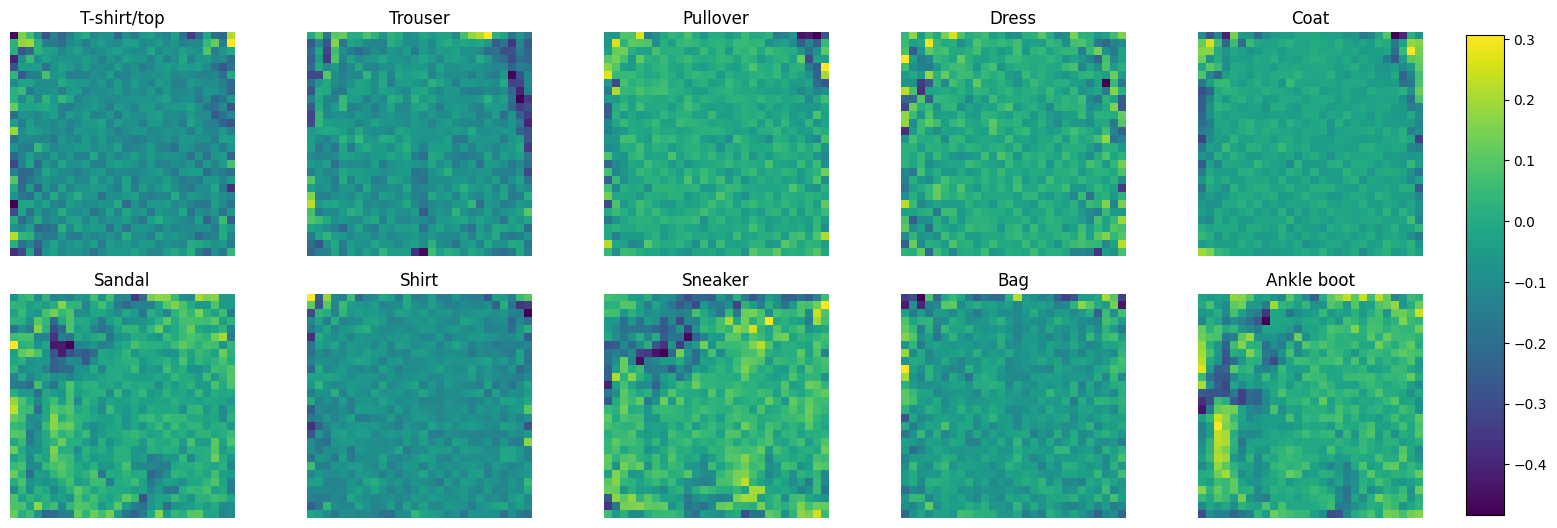

In [ ]:
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation

# Definimos el modelo secuencial (primero esta vacio)
model_simple = Sequential()

# Agregamos una capa de 10 perceptrones con activación logística (softmax)
model_simple.add(Dense(10,activation='softmax'))

# la función Dense() crea una capa de 10 nodos (perceptrones) que está fully connected, es decir que todas las entradas obtienen un peso para todos los nodos
# por lo que la cantidad de pesos en este caso sería 784x10 (784 pesos, uno por cada entrada del vector input para cada uno de los perceptrones)

#la funcion a optimizar sera la categorical cross entropy. Queremos arreglar los outputs de forma tal que esta funcion tenga un minimo local,
#y la forma de arreglar esos outputs es arreglando a su vez los weights and biases.
model_simple.compile(loss='categorical_crossentropy', metrics=['categorical_accuracy'], optimizer='adam')

#entrenamos la red
history = model_simple.fit(X_train, Y_train,
          batch_size=32, epochs=10, # 10 epocas de entrenamiento de 32 ejemplos cada una
          verbose=1, # para que nos vaya indicando por qué instancia de entrenamiento va
          validation_data=(X_test, Y_test)) # es análogo al .fit() de las regresiones que vimos en otras clases

#podemos ver uno de los vectores con los weights de una neurona sigmoidea
weigths = model_simple.get_weights()[0] # accedo a la matriz de pesos W de cada perceptrón
print(weigths.shape)

#podemos visualizar los weights segun la importancia que le dan a cada pixel para poder clasificar correctamente la ropa
plt.figure(figsize = (15,8)) # seteo el tamaño de la figura
for i in range(10): # i va desde 0 a 9 (range(10) es un vector que empieza en 0 y termina en 10-1=9 con steps de 1)
    plt.subplot(3,5,i+1) # hago subplots en 2 filas y 5 columnas
    w0 = weigths[:,i] # accedo a la matriz de pesos del perceptrón i-ésimo correspondiente a la clase i-ésima
    plt.title(categories[i]) # imprimo la categoría i-ésima correspondiente al i-ésimo perceptrón
    plt.imshow(w0.reshape(28,28)) # reshapeo el vector de pesos i-ésimo (784,) a (28,28) para recuperar el formato de las imágenes
    plt.axis('off')
plt.tight_layout()
cax = plt.axes([1, 0.35, 0.025, 0.6])
plt.colorbar(cax=cax)
plt.show()
plt.show()

Vemos que efectivamente los weights son mas fuertes donde uno esperaria que lo fueran para poder reconocer los distintos tipos de prendas, segun la tarea de la neurona sigmoidea especifica.

#La Cost function
¿Como ajustamos acordemente los weights and biases para obtener los outputs deseados?
Debemos tener una guia, una funcion, que nos diga cuando los weight and biases estan haciendo un buen trabajo clasificando la ropa, y cuando no.
Esta funcion es la cost function.

En el ejemplo anterior usamos una cost function que involucra un logaritmo, pero para empezar podemos pensar en una aun más simple, que funciona igual de bien: El error cuadratico.

Lo que hacemos es tomar las predicciones de nuestro output y compararla con la prediccion correcta. Es decir, necesitamos de tags, es aprendizaje supervisado.

De la resta entre lo que predijimos y el valor real, le calculamos la norma, y obtenemos una 'distancia' entre lo que deberia ser y lo que es. Luego, tratamos de minimizar esa funcion, para que nuestras predicciones se parezcan lo mas posible a la realidad. Una vez que hayamos encontrado los weight and biases que llevan a la funcion de costo a un minimo local, habremos 'enseñado' a nuestra red neuronal a clasificar ropa. Habremos tuneado los weight and biases de manera tal que puede tener exito en clasificar ejemplos que nunca vio, pues aprendio las reglas para clasificar en base a la experiencia que gano en el training, cuando fuimos buscando el minimo de la cost function, aplicando los cambios pertinentes a los weight and biases.

$C(w, b)=\frac{1}{n}\sum_x \frac{\| y(x) - a \|^2}{2}$

Donde n es el numero de training inputs, x es el training input en cuestion (que va a arrojar una prediccion al pasar por y(x)), y a es el resultado esperado. Dividimos por 2 para obtener el promedio de la 'medida' que arroja el calculo de la norma de la resta al cuadrado.

Mientras mas se parezca y(x) con a, mas pequeño sera el valor de la cost function. Habremos encontrado los w, b que minimizan a la cost function.

Debemos recordar que y(x) depende no solo del training input x, sino tambien de w y b, pues segun se ajusten dichos parametros, cambiarán las predicciones de nuestra red, asi que en realidad es $y(x, w, b)$.

#Volviendo al descenso por gradiente, pero con approach puramente matematico
Como nuestro objetivo es minimizar una funcion, vamos a olvidarnos por un momento de la complejidad de las redes neuronales, y vamos a enfocarnos en minimizar una funcion cualquiera de solo dos variables.

Digamos que la funcion es cuestion tiene las variables $x_1$ y $x_2$, entonces es $C(x_1, x_2)$.

El calculo nos dice que un pequeño cambio en la funcion $C$ viene dado por:

$\triangle C ≈ \frac{\partial C}{\partial x_1}\triangle x_1 + \frac{\partial C}{\partial x_2}\triangle x_2$

Vamos a buscar una manera de elegir $\triangle x_1$ y $\triangle x_2$ de manera tal que $\triangle C$ sea negativo, es decir, que:
$\triangle C = C_f - C_i < 0 \Rightarrow C_f < C_i$, es decir, nos movimos hacia un valor *menor* al que estabamos previamente.

Para ayudar a ver como lograr esto, es buena idea definir el vector de los cambios en $x_1$ y $x_2$:
$\triangle x =(\triangle x_1, \triangle x_2)^T$

Definimos tambien el gradiente de $C$, que es el vector con las derivadas parciales de $C$ con respecto a $x_1$ y $x_2$:

$\nabla C = (\frac{\partial C}{\partial x_1}, \frac{\partial C}{\partial x_2})^T$

Podemos escribir entonces a los cambios en $C$ como:

$\triangle C ≈ \nabla C \cdot \triangle x$

Como queremos que esto nos de siempre negativo (para avanzar en la direccion contraria del gradiente), seteamos:

$\triangle x = -\mu \nabla C$

De modo que ocurre

$\triangle C ≈ \nabla C \cdot (-\mu \nabla C) = -\mu \nabla C^2$

y siempre obtendremos que el nuevo valor de C sera mas pequeño que el viejo.
Tenemos entonces que el nuevo valor de v debera ser

$\triangle x = x_f - x_i = -\mu \nabla C \Rightarrow x_f = x_i - \mu \nabla C$

Es decir, si $x_i = (x_{i1}, x_{i2})$ es el punto en el plano donde estamos evaluando a la cost function, si ahora lo pensamos como un vector en el plano y le sumamos puntita con colita al vector $-\mu \nabla C$, vamos a caer en un nuevo punto/vector $x_f = (x_{f1}, x_{f2})$ que si evaluamos alli la funcion C, el resultado sera un valor mas pequeño que el que teniamos previamente para el punto/vector $x_i$.

Una vez que se movio a esta nueva posicion en $x_f$, calculamos nuevamente el gradiente en el punto y volvemos a aplicar la regla de update $x_f = x_i - \mu \nabla C$, donde ahora el $x_i$ es el $x_f$ del paso anterior, y el nuevo $x_f$ sera un punto donde al calcular C obtendremos un valor menor al que teniamos previamente (y al que teniamos previo a eso, por transitividad).

Una vez que nos movimos lo suficiente siguiendo la direccion que nos va indicando los sucesivos calculos del gradiente, podemos llegar a un minimo local. Si asi fuera, diremos que el algoritmo encontro los weights and biases tales que minimizan la cost function, es decir, que producen la menor diferencia entre los resultados predichos y los resultados reales.
Son la mejor forma de ajustar dichas variables para que la red funcione correctamente.

#Volviendo a la red neuronal, con los insights ganados en la matematica

Dejando de lado las variables matematicas que introducimos, volvemos a las variables de las redes neuronales:

$w_k → w_k' = w_k - \mu \frac{\partial C}{\partial w_k} \\ b_l → b_l' = b_l - \mu \frac{\partial C}{\partial b_l} $


Recordemos que calculabamos la cost function como $C(w, b)=\frac{1}{n}\sum_x \frac{\| y(x) - a \|^2}{2}$, como un promedio de las 'distancias' entre el valor predicho por nuestra red y el valor esperado.
El problema con esta cost function es que, cuando la cantidad de training inputs $x$ es muy grande, el calculo tarda demasiado en la practica.
Lo que se hace es aplicar una idea llamada Descenso de gradiente estocástico, que se basa en no dar el paso óptimo cada vez, el que más disminuye la cost function, sino dar un paso en la dirección correcta, lo suficientemente bueno para asegurarnos que el valor de la cost function disminuirá.
Sacrificamos precision por tiempo, el tiempo es el recurso mas valioso.


#Descenso de gradiente estocástico
La idea es entrenar la red no con todos y cada uno de los training inputs $x$, sino seleccionar algunas muestras de toda la población, y entrenar a la red con dichas muestras, confiando en que las demás se van a comportar de manera similar a como lo hace la muestra. Much like when census happens.
Lo que decimos es:

$\frac{\sum_{j=1}^m \nabla C_{X_j}}{m} ≈ \frac{\sum_x \nabla C_x}{n} = \nabla C$

Donde m abarca lo que se conoce como un mini-batch, es decir, no vamos hasta todo el batch con los n training inputs, sino que nos limitamos a m entrenamientos.
El calculo de los nuevos sets de weights and biases que minimizan la cost function con este approach es:

$w_k → w_k' = w_k - \frac{\mu}{m} \sum_j \frac{\partial C_{X_j}}{\partial w_k} \\ b_l → b_l' = b_l - \frac{\mu}{m} \sum_j \frac{\partial C_{X_j}}{\partial b_l} $


Donde $X_j$ es uno de los m training inputs en el minibatch. Al ir por todos y cada uno de los m entrenamientos, se dice que se ha completado una época de entrenamiento. En ese punto, empezamos con una nueva época de entrenamiento.

En cuanto a $\frac{\mu}{m}$, esto se conoce como el factor de aprendizaje, pues influye en que tan grande o pequeño demos el paso en la direccion indicada por el promedio de las derivadas. Hay muchas convenciones sobre cómo debería calcularse, y es otro de los factores a ajustar al entrenar nuestra red neuronal.

#Probando la red neuronal

Ponemos a trabajar a la red neuronal ya entrenada para que clasifique ropa que nunca vio:

In [ ]:
import sklearn.metrics as metrics
# Usamos el modelo para predecir sobre todas las instancias en ambos sets
y_train_pred = model_simple.predict(X_train)
y_test_pred = model_simple.predict(X_test)

# Tomamos como clase predicha aquella con mayor probabilidad
train_accuracy =  metrics.accuracy_score(y_train_pred.argmax(axis=1),y_train)
# y_train_pred.argmax(axis=1) es un vector de longitud igual a la longitud de y_train_pred
# pero que en cada elemento tiene el número de clase con mayor probabilidad en vez de un vector con las 10 probabilidades
test_accuracy =  metrics.accuracy_score(y_test_pred.argmax(axis=1), y_test)

print('Accuracy en el train set:', train_accuracy)
print('Accuracy en el test set:', test_accuracy)

313/313 [==============================] - 0s 1ms/step
Accuracy en el train set: 0.7966666666666666
Accuracy en el test set: 0.7731


Vemos que tiene un buen porcentaje de exito tanto en el dataset de entrenamiento como en el de testing.

Podemos tambien mirar la matriz de confusion

In [ ]:
from sklearn.metrics import confusion_matrix

print ("Matriz de confusion")
print(confusion_matrix(y_test, y_test_pred.argmax(axis=1)))

Matriz de confusion
[[781  13  10 128  14   4  46   0   4   0]
 [  2 964   0  26   5   0   2   1   0   0]
 [ 19  19 502  42 395   1  21   0   1   0]
 [ 22  29   9 892  39   0   7   1   0   1]
 [  0   8  24  57 899   0  12   0   0   0]
 [  0   0   0   2   0 928   0  34   1  35]
 [155   3  80 147 384   0 230   0   1   0]
 [  0   0   0   0   0  80   0 887   0  33]
 [ 21   2   6  57  58  41  87   9 715   4]
 [  0   1   0   0   0  17   1  48   0 933]]


Podemos incluso mirar un ejemplo en particular, por ejemplo podemos pedirle que clasifique el primer elemento del test dataset, y compararlo con la etiqueta que deberia tener

In [ ]:
salida = model_simple.predict(X_test[0:1]) # análogo al .predict_proba() que de sklearn

print('Shape de la salida:',salida.shape)
print('Salida:',salida)

ertiqueta_prediccion = categories[salida[0].argmax()] # me quedo con el índice que tiene el elemento de máximo valor
etiquta_real = categories[y_test[0]] # me fijo cuál era la etiqueta real

print('Clase asignada por la red:', ertiqueta_prediccion)
print('Clase real:', etiquta_real)

1/1 [==============================] - 0s 23ms/step
Shape de la salida: (1, 10)
Salida: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Clase asignada por la red: Ankle boot
Clase real: Ankle boot


El vector de salida es un vector con las probabilidades de que el ejemplo pertenezca a una clase u otra. Vemos que la red esta 100% convencida de que es una bota, y esta en lo correcto.